In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-17 16:13:45.637816


# Matplotlib 1 - yksinkertainen pylväskaavio

Jos teen kaavion suoraan dataframesta (<b>df.plot...</b>), niin käytän pandas-kirjastoon matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
Lue lisää https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Grafiikkaa varten tuon <b>matplotlib.pyplot</b>-kirjaston <b>plt</b>-nimisenä. Kirjastosta löytyy paljon funktioita grafiikan muotoiluun.
Lue lisää https://matplotlib.org/stable/api/pyplot_summary.html

Oletustyylin lisäksi grafiikkaan on tarjolla useita vaihtoehtoisia tyylejä: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
Sopivan tyylin valinnalla voit vähentää grafiikan muokkaukseen tarvittavien käskyjen määrää. Käytän esimerkeissäni tyyliä **'seaborn-white'.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Käytän oletustyylin sijasta 'seaborn-white' tyyliä
plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Lasken eri koulutuksen suorittaneiden lukumäärät
df1 = pd.crosstab(df['koulutus'], 'f')
df1.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.columns.name = ''
df1

,f
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


## Vaakapylväskaavio

Teen äsken luomastani dataframesta vaakapylväskaavion **plot**-toiminnolla. Plot-toiminnolla voin luoda eri kaaviolajeja, esimerkiksi pystypylväskaavion **bar** tai vaakapylväskaavion **barh**.

<AxesSubplot:>

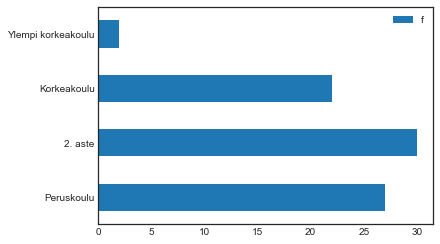

In [5]:
df1.plot.barh()

## Kaavion tekstit

Mielestäni yhden arvosarjan kaavioissa selite on tarpeeton, joten piilotan sen **legend**-parametrilla.

Kaavion otsikoksi (**title**) annan 'Koulutusjakauma'.

Arvoakselin otsikoksi (**xlabel**) annan 'Lukumäärä'. 

Text(0.5, 0, 'Lukumäärä')

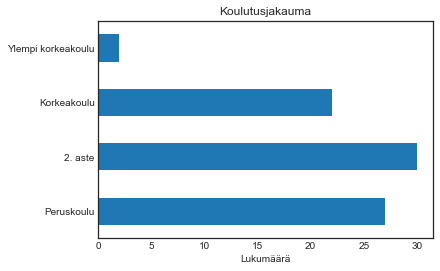

In [6]:
df1.plot.barh(legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

## Hienosäätöä

Lisään x-akselin jakoviivojen mukaisen taustaviivoituksen (**grid**).

Lisään pylväiden pituuksia vastaavat lukumäärät pylväiden viereen:

* Käytän apuna **for**-silmukkaa, jolla käyn läpi kaavion pylväät (pylväät muodostavat **patches**-kokoelman) yksi kerrallaan
* Kaavioon pääsen käsiksi **gca**-funktiolla (get current axes)
* Vaakasuuntaisen pylvään pituuden saan **get_width**-funktiolla
* Vaakasuuntaisen pylvään alareunan sijainnin saan **get_y**-funktiolla
* Pylvään paksuuden saan **get_height**-funktiolla
* Lisään **text**-funktiolla (x, y)-sijaintiin x:n sopivasti muotoiltuna 
* **va** tarkoittaa pystysuuntaista tasausta (vertical alignment).

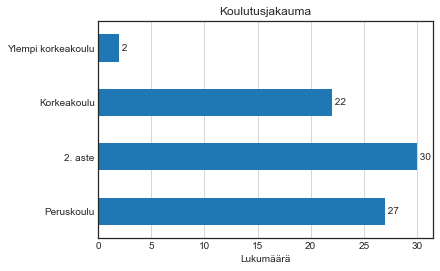

In [7]:
df1.plot.barh(legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

plt.grid(axis='x')

for bar in plt.gca().patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, f' {x:.0f}', va='center')

## Pystypylväskaavio

Pienin muutoksin voin toteuttaa edellisen pystypylväskaaviona.

* Huomaa luokka-akselin otsikoiden 45 asteen kääntö (**rotation**)
* Huomaa pylvään pituuksia vastaavien lukuarvojen siirto hieman ylöspäin (**y + 0.5**), koska muuten lukuarvot olisivat pylväissä kiinni
* **ha** tarkoittaa vaakasuuntaista tasausta (horizontal alignment)
* Huomaa, että yläreunaan on lisätty hieman tilaa skaalamalla arvoakseli (**ylim(0, 35)**)

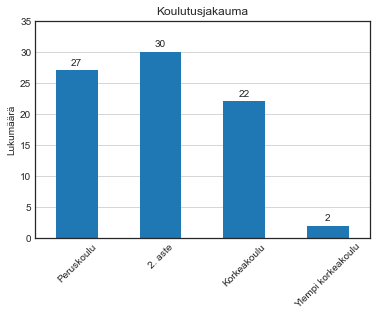

In [8]:
df1.plot.bar(legend=False, rot=45)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')

plt.grid(axis='y')

plt.ylim(0, 35)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y+0.5, f'{y:.0f}', va='bottom', ha='center')

## Prosenttien esittäminen

In [9]:
# Luon dataframen, jossa prosentit
df2 = pd.crosstab(df['koulutus'], 'f')
df2['f (%)'] = df2['f'] / df2['f'].sum() * 100
df2.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df2.columns.name = ''
df2

,f,f (%)
Peruskoulu,27,33.333333
2. aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


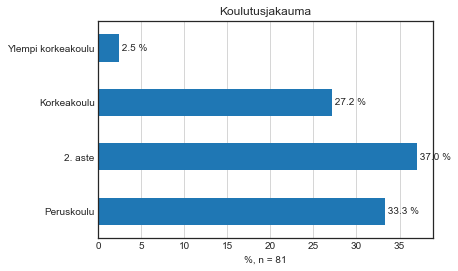

In [10]:
df2['f (%)'].plot.barh()

plt.title('Koulutusjakauma')

# n-arvo akselin otsikkoon
n = df2['f'].sum()
plt.xlabel(f'%, n = {n}')

plt.grid(axis='x')

for bar in plt.gca().patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, f' {x:.1f} %', va='center')

## Kaavion tallennus

Kun tallennan kaavion **savefig**-funktiolla, niin tarkkaan ottaen tallennan kuvion (**figure**), jonka sisällä kaavio on. Kuvioon pääsen käsiksi **plt.gcf**-funktiolla (get current figure).

Ilman parametria **bbox_inches='tight'** osia kaavion reunoilta voi jäädä tallentumatta.

Tallennusmuoto määräytyy tiedostonimen tarkentimen (esimerkiksi png) perusteella. Mahdolliset tallennusmuodot selviävät käskyllä `plt.gcf().canvas.get_supported_filetypes()`

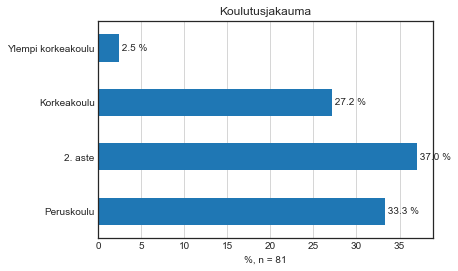

In [11]:
df2['f (%)'].plot.barh()

plt.title('Koulutusjakauma')

# n-arvo akselin otsikkoon
n = df2['f'].sum()
plt.xlabel(f'%, n = {n}')

plt.grid(axis='x')

for bar in plt.gca().patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, f' {x:.1f} %', va='center')
    
# Tallennus
plt.gcf().savefig('testi1.png', bbox_inches='tight')

## Lisätietoa

Matplotlib - osa 2 käsittelee useamman arvosarjan pylväskaavioita:
https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb